<a href="https://colab.research.google.com/github/AzisilhamK463/PCVK_2023/blob/main/week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pertemuan Minggu ke-10**

**Nama: Azis Ilham Kurniawan**

**NIM: 2141720145**'

**Kelas: TI-3F**

# Langkah Praktikum

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pytesseract

In [ ]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

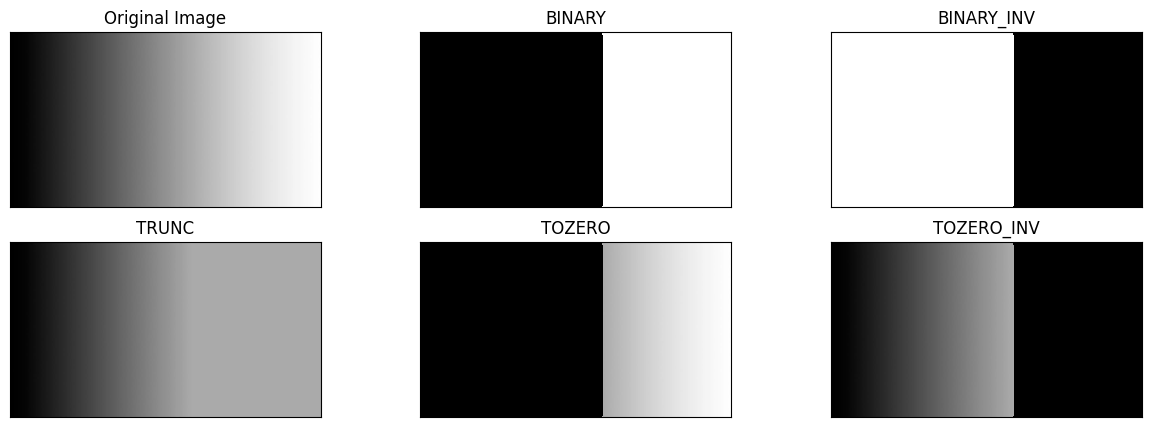

In [ ]:
filename = ('/content/drive/MyDrive/dataset/gradient.jpg')

img = cv.imread(filename)
thresh1 = cv.imread(filename)
thresh2 = cv.imread(filename)
thresh3 = cv.imread(filename)
thresh4 = cv.imread(filename)
thresh5 = cv.imread(filename)

thresh = 170      #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255     #tanpa library
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1       #tanpa library

#3. Threshold Truncate
thresh3[img>thresh] = thresh  #tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0      #tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0       #tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

167


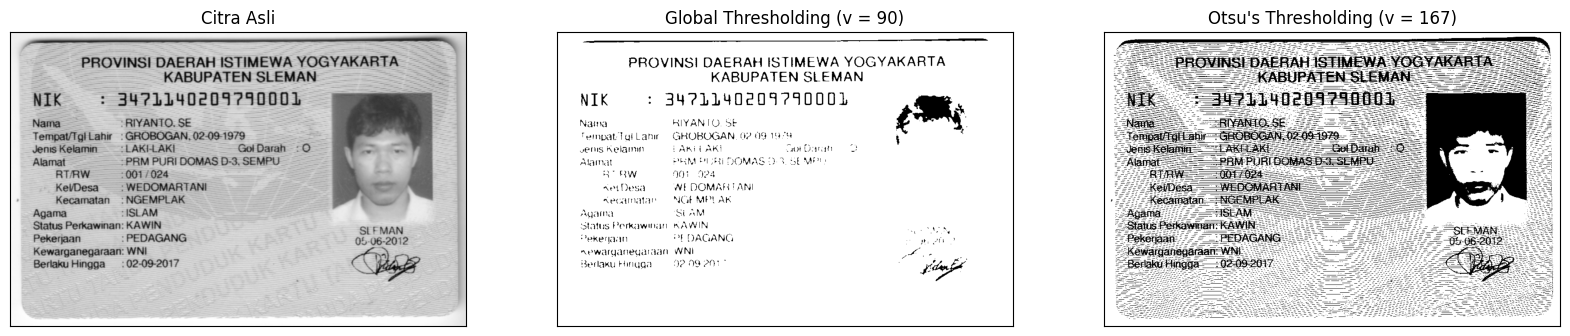

In [ ]:
filename = ('/content/drive/MyDrive/dataset/ktp.png')

img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
def otsu(gray):
  pixel_number = gray.shape[0] * gray.shape[1]
  mean_weight = 1.0/pixel_number
  his, bins = np.histogram(gray, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)

  for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
    pcb = np.sum(his[:t])
    pcf = np.sum(his[t:])
    Wb = pcb * mean_weight
    Wf = pcf * mean_weight
    mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
    muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
    #print mub, muf
    value = Wb * Wf * (mub - muf) ** 2
    if value > final_value:
      final_thresh = t
      final_value = value

  final_img = gray.copy()
  print(final_thresh)
  final_img[gray > final_thresh] = 255
  final_img[gray < final_thresh] = 0
  return final_img, final_thresh
otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv.threshold(blur,90,255,cv.THRESH_BINARY)
#ret,th2 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]
plt.figure(figsize = (20,15))
for i in range(len(citra3)):
  plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

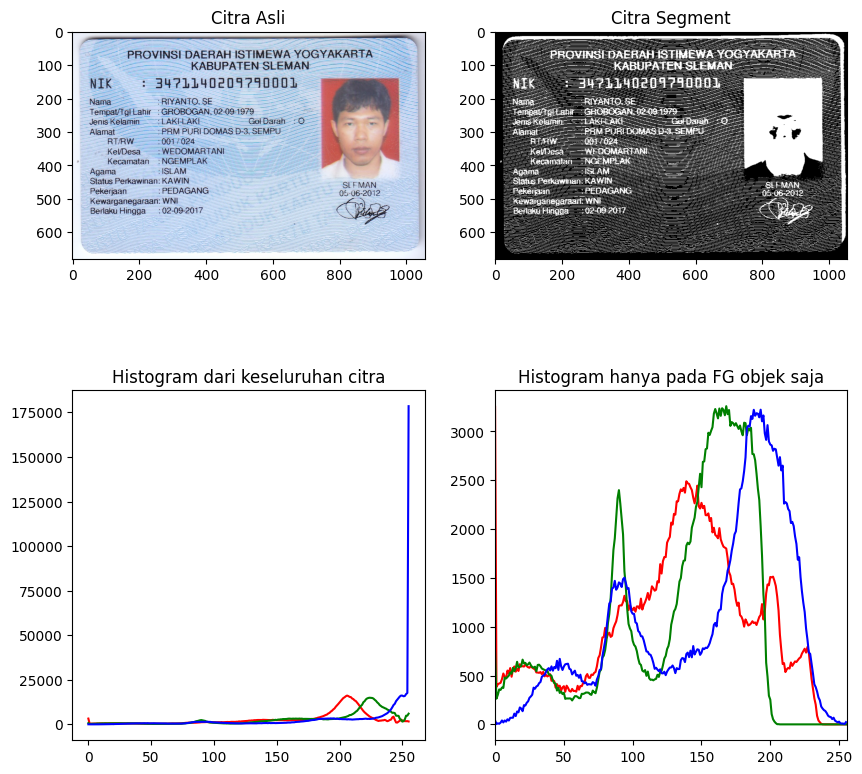

In [ ]:
filename = ('/content/drive/MyDrive/dataset/ktp.png')

img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
  hist0 = cv.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])
plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7e5009e33430>)

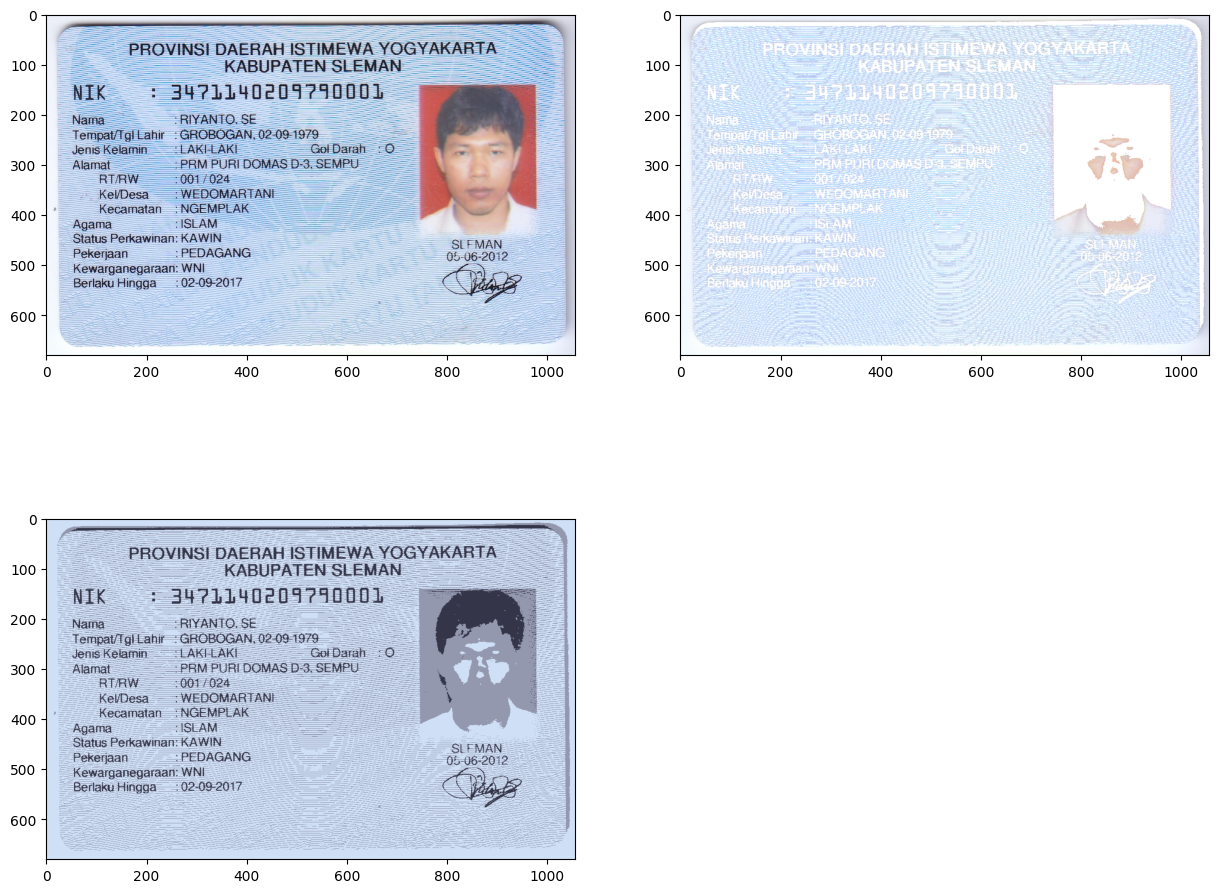

In [ ]:
Filename = ('/content/drive/MyDrive/dataset/ktp.png')

img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masukan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))

#convert to float
pixel_values = np.float32(pixel_values)

'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah
iterasi = 100 atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 150, 0.1)

'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange). untuk percobaan ini kita akan gunakan 3 cluster
untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

#konversi titik centroid kedalam integer
centers = np.uint8(centers)

#flattening label array
labels = labels.flatten()

#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]

# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)
plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

# Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 1s (5,141 kB/s)
debconf: unable to ini

In [ ]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [ ]:
from pytesseract import Output
img = cv.imread('/content/drive/MyDrive/dataset/ktp.png')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


PROVINSI JAWA BARAT

 

KOTA CIMAHI
NIK : 3217061804870007
Nama 1 ARIEF WIJAYA PUTRA
Tempat/Tgi Lahir : BANDUNG, 18-04-1987
Jenis kelamin : LAKI-LAKI Gol. Darah :-
Alamat : JL. AMIR MAHMUD GG.
SIRNAGALIH NO. 62

RT/RW 1005/2006

Kel/Desa : CIBABAT

Kecamatan : CIMAHI UTARA
Agama : ISLAM
Status Perkawinan: BELUM KAWIN KOTA CIMAHI
Pekerjaan : PELAJAR/MAHASISWA 17-11-2015
Kewarganegaraan : WNI

Berlaku Hingga

: SEUMUR HIDUP



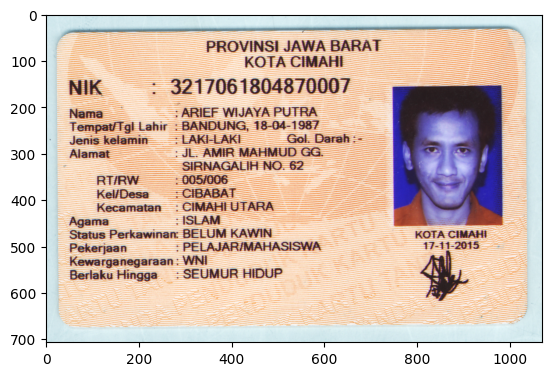

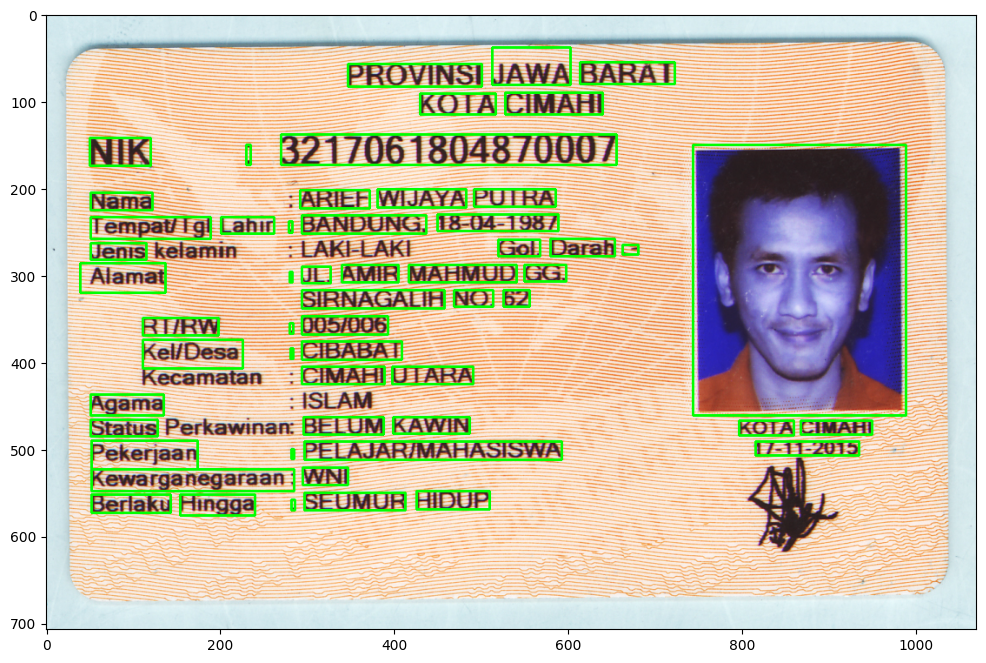

In [21]:
img = cv.imread("/content/drive/MyDrive/dataset/ktp2.png")

plt.imshow(img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_TRUNC)
# threshed = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)

text1 = pytesseract.image_to_data(threshed,output_type='data.frame')

text2 = pytesseract.image_to_string(threshed, lang="ind")

print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()
n_boxes = len(text1['text'])

for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
     (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
     img = cv.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
display(img)

# Tugas Praktikum

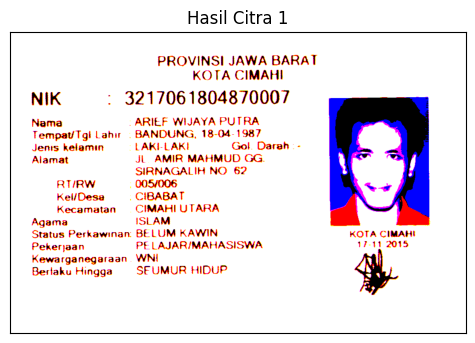

In [57]:
img = cv.imread("/content/drive/MyDrive/dataset/ktp2.png")
blur = cv.GaussianBlur(img,(5,5),0)
ret, th1 = cv.threshold(blur, 90, 255, cv.THRESH_BINARY)

plt.figure(figsize = (20,15))
plt.subplot(1,3,1), plt.imshow(th1,'gray')
plt.title('Hasil Citra 1')
plt.xticks([]), plt.yticks([])

plt.show()

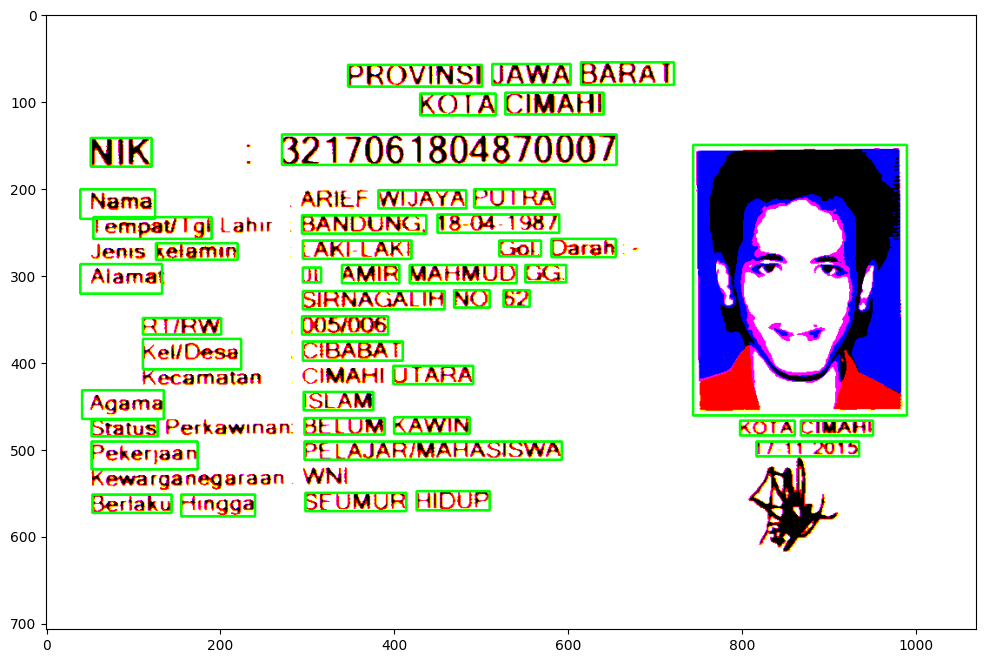

In [58]:
th, threshed = cv.threshold(blur, 127, 255, cv.THRESH_TRUNC)
# threshed = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")

n_boxes = len(text1['text'])

for i in range(n_boxes):
  if int(text1['conf'][i]) > 60:
     (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
     img = cv.rectangle(th1, (x, y), (x + w, y + h), (0, 255, 0), 2)
display(img)

In [59]:
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

PROVINSI JAWA BARAT

 

KOTA CIMAHI
NIK : 3217061804870007
Nama : ARIEF WIJAYA PUTRA
Tempat/Tgi Lahir : BANDUNG, 18-04-1987
Jenis kelamin : LAKI-LAKI Gol. Darah :-
Alamat JL. AMIR MAHMUD GG.
SIRNAGALIH NO 62

RT/IRW : 005/006

Kel/Desa : CIBABAT

Kecamatan CIMAHI UTARA
Agama ISLAM
Status Perkawinan BELUM KAWIN KOTA CIMAHI
Pekerjaan PELAJAR/MAHASISWA 17-11-2015

Kewarganegaraan. WNI
Berlaku Hingga SEUMUR HIDUP

